In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Example 2.1
# 1 indicates blue marble and 0 indicates white marble
possibilities = np.array([[0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1]])
observed = np.array([1, 0, 1])

# Find number of ways to observe the observed given each possibility
num_ways_to_observe = np.vstack([(possibilities == o).sum(axis=1) for o in observed]).prod(axis=0)
probabilities = num_ways_to_observe / sum(num_ways_to_observe)
print("Probabilities of having n blue marbles:", list(enumerate(probabilities)))


Probabilities of having n blue marbles: [(0, 0.0), (1, 0.15), (2, 0.4), (3, 0.45), (4, 0.0)]


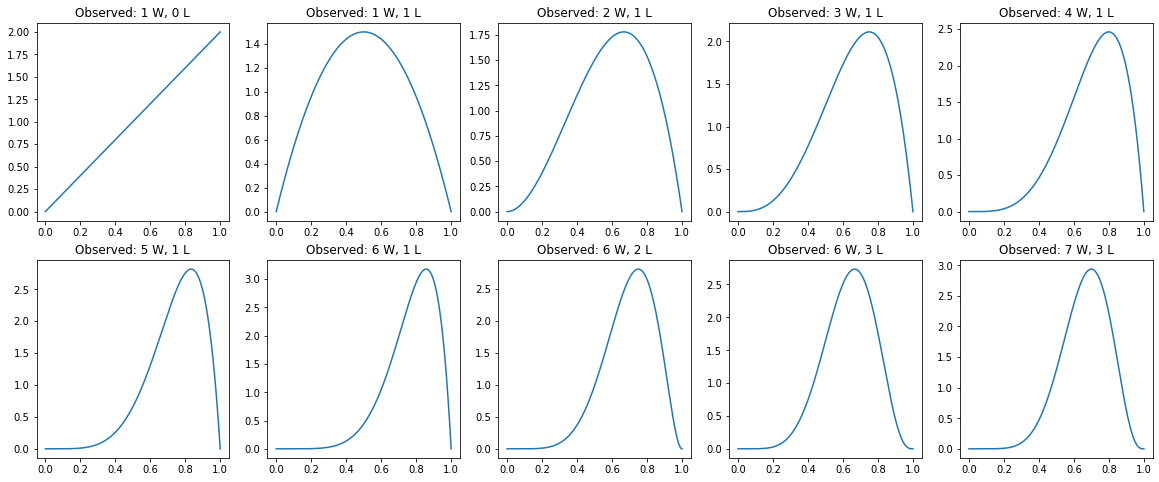

In [30]:
ps = np.linspace(0, 1, 1000)
prior = np.ones(1000)
true_p = 0.7
num_trials = 10
np.random.seed(0)
observed = np.random.binomial(1, true_p, num_trials)

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(num_trials):
    multiplier = ps if observed[i] else 1 - ps # Probability of getting result given each p in ps
    posterior = prior * multiplier
    posterior = len(ps) * posterior / sum(posterior) # normalize posterior so that it is a PDF
    prior = posterior # Posterior becomes prior for next iteration

    # Plot probabilities and probability density function
    axis = axs[i//5, i % 5]
    water = observed[:i+1].sum()
    axis.set_title("Observed: {w} W, {l} L".format(w=water, l=i-water+1))
    axis.plot(ps, posterior)
plt.show()
    